# Assignment 2

Create a program to evaluate the Generalization Error (GE), Prediction Model Error (ME) and Training Error (TE) for the k-nearest neighbors (KNN) learning approach. For doing so, compute the model considering neighborhood sizes from 1 to 35.

### Imports:

In [2]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

### Built-in Custom Functions:

In [3]:
def KNN(N_size, x_train, Y_train, x_test):
    '''
    This function implements the KNN regression learning model. The required
    inputs are the following:
    -   N_size (integer): size of the neighborhood. Automatically reduced to
    training dataset size if greater than it.
    -   x_train (1-D list): list of x values related to the training data set.
    -   Y_train (1-D list): list of Y values related to the training data set.
    -   x_test (1-D list): list of x values related to the testing data set.

    The function outputs the following:
    -   Y_hat (1-D list): list containing the KNN regressed values for the 
    x_test data set according to the model training.
    '''

    N_size = np.minimum(len(x_train), N_size)

    x_i = [[x] for x in x_train]

    KNN = KNeighborsRegressor(N_size).fit(x_i, Y_train)

    x_i = [[x] for x in x_test]

    Y_hat = KNN.predict(x_i)

    return Y_hat


## Solution Code:

### Data Sets and Learning Model:


#### Training Set:

With $N^{training} = 50$:


- Generate $x_i$, $N^{training}$ uniformly separated data points between 0 and 1.

- Generate $n_i$, $N^{training}$ noise data points randomly distributed with 0 mean and 0.1 variance.

- Build the observed data model as: 

$Y_i^{training} = f(x_i) + n_i$, with $\space i = 1 ... N^{training}$ and $f(x) = sin(2 \pi · x)$

In [4]:
# Defining function to generate a set of data
def gen_data(n_samples: int) -> np.ndarray:
    def func_x(input):
        return np.sin((2)*(np.pi)*(input))

    #x_i = np.linspace(0, 1, num=n_samples)

    x_i = []
    delx = 1/n_samples

    for x in range(n_samples):
        x_i.append(x*delx)
    

    #noise 
    n_i = np.random.normal(loc=0, scale=np.sqrt(0.1), size=n_samples)

    #combining features + noise
    generated_samples = func_x(np.array(x_i)) + n_i


    #Dataset size
    print(f'Shape of generated labels: {np.shape(generated_samples)}\nShape of generated inputs: {np.shape(np.array(x_i))}')

    return np.array(x_i), generated_samples 

### Generating training set (`n_samples` = 50)

In [5]:
X_train, y_train = gen_data(n_samples=50)

Shape of generated labels: (50,)
Shape of generated inputs: (50,)


#### Testing Set:

With $N^{testing} = 300$:


- Follow the same previous steps, using $N^{testing}$ instead of $N^{training}$.

In [6]:
X_test, y_test = gen_data(n_samples=300)

Shape of generated labels: (300,)
Shape of generated inputs: (300,)


In [7]:
print(f'y_train: {y_train}')
print('--------------------')
print(f'y_test: {y_test}')

y_train: [ 0.58718174 -0.09592798 -0.01151773  0.15874936  0.36312671  0.12122138
  0.52174644  1.18437409  0.65503705  0.7126996   0.88239709  0.77147638
  1.28499775  1.09354353  1.3580344   0.42427287  0.68993763  0.81938566
  0.44967138  0.52985377  0.86111061  1.00324257  0.58314968 -0.13733754
 -0.42106059  0.14516033 -0.16510674 -0.38819627 -0.29186663 -0.09333516
 -1.49110678 -0.95646279 -0.39868545 -0.69364405 -1.00211033 -1.22662278
 -1.5262303  -0.56570946 -0.98340255 -1.28115115 -1.56122496 -1.13826002
 -0.65763149 -0.55095053 -1.03717204 -0.80024074 -0.21778337 -0.34948499
 -0.58337568  0.22155587]
--------------------
y_test: [-0.0603268  -0.34330882  0.12097775 -0.56573682 -0.18123349  0.07354387
 -0.46328129  0.18464867  0.44068727 -0.29577629  0.23346481 -0.14616807
  0.1228918  -0.06772729  0.15163038  0.69247277 -0.04484949  0.08997165
 -0.05027544  0.11803145 -0.23865677  0.44789333  0.20683841  0.59310037
  0.27621026  0.56677719  0.88352335  0.01259967  0.84740115

#### Learning Model:

Use the K-Nearest Neighbors to evaluate its performance. Plot the model result for neighborhood sizes of 1, 5, 15, 25 and 40.

In [8]:
import matplotlib.pyplot as plt

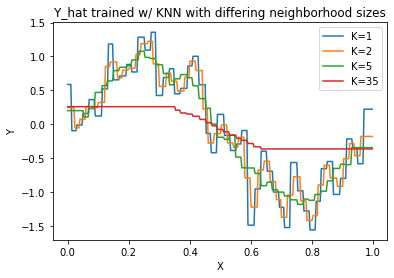

In [9]:
N_sizes_plot = [1,2,5,35] #Plot these neighborhood sizes

legend_names=['K=1', 'K=2', 'K=5', 'K=35', 'Y_train']
for n in N_sizes_plot:
    y_hat = KNN(N_size=n, x_train=X_train, Y_train=y_train, x_test=X_test)
    plt.plot(X_test, y_hat)
    plt.legend(legend_names)

#plt.plot(X_train, y_train)
plt.title('Y_hat trained w/ KNN with differing neighborhood sizes')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()


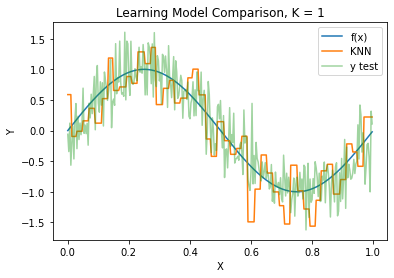

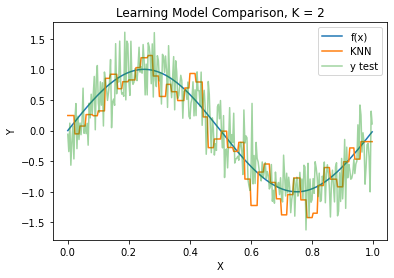

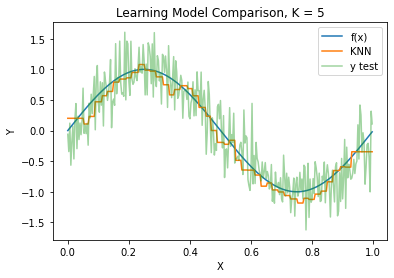

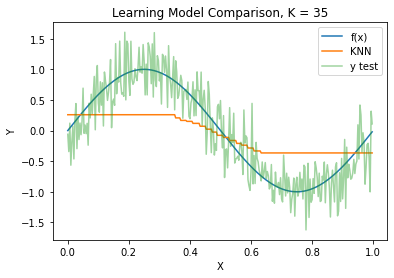

In [10]:
def plot_model_comparison(y_hat, k):
    plt.plot(X_test, np.sin(2*np.pi*X_test))
    plt.plot(X_test, y_hat)
    plt.plot(X_test, y_test, alpha=0.45)
    plt.title(f'Learning Model Comparison, K = {k}')
    plt.legend(['f(x)', 'KNN', 'y test'])
    plt.xlabel('X')
    plt.ylabel('Y')
    
for n in N_sizes_plot:
    y_hat = KNN(N_size=n, x_train=X_train, Y_train=y_train, x_test=X_test)
    plot_model_comparison(y_hat, k=n)
    plt.show()

Clearly, K = 5 fits it the best

### Evaluation:

#### Error analysis

Note that I had to edit the KNN function provided above in order for the error analysis to work properly. There was currently an error where the previously provided KNN function fell short in calculating the training error because after regressing it would just predict on the testing set. However in the case of calculating TE we need the KNN to predict over the training set and that y_hat was used in the calculation of TE. I simply added an input argument `predict_test` which when `False` would use the training set to make y_hat predictions.

In [138]:
def KNN_edited(N_size, x_train, Y_train, x_test, predict_test:bool):
    '''
    This function implements the KNN regression learning model. The required
    inputs are the following:
    -   N_size (integer): size of the neighborhood. Automatically reduced to
    training dataset size if greater than it.
    -   x_train (1-D list): list of x values related to the training data set.
    -   Y_train (1-D list): list of Y values related to the training data set.
    -   x_test (1-D list): list of x values related to the testing data set.
    -   predict_test (boolean): True or False wether or not you want to make predictions on the testing set. 
    If False it will default and make predictions on the training set (x_train)

    The function outputs the following:
    -   Y_hat (1-D list): list containing the KNN regressed values for the 
    x_test data set or x_train data setaccording to the model training.
    '''

    N_size = np.minimum(len(x_train), N_size)
    if predict_test: #If we want to make predictions on the x_test
        x_i = [[x] for x in x_train]
        KNN = KNeighborsRegressor(N_size).fit(x_i, Y_train)
        x_i = [[x] for x in x_test]
        Y_hat = KNN.predict(x_i)
    elif not predict_test: #If we want to make predictions on the x_train, this is used in the TE calculation
        x_i = [[x] for x in x_train]
        KNN = KNeighborsRegressor(N_size).fit(x_i, Y_train)
        Y_hat = KNN.predict(x_i)
    return Y_hat


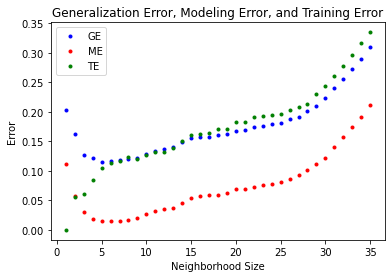

In [139]:
N_test = 300
N_train = 50
N_sizes_plot = [1,2,5,35] #Plot these neighborhood sizes
f_x = np.sin(2.*np.pi*X_test)

for n in range(1,36):
    ge = 0
    me = 0
    y_hat = KNN_edited(N_size=n, x_train=X_train, Y_train=y_train, x_test=X_test, predict_test=True)
    for j in range(0,N_test):
        ge+=((y_test[j]-y_hat[j])**2) #Generalization error calculation
        me+=((f_x[j]-y_hat[j])**2) #Modeling error calculation

    me = me/N_test
    ge = ge/N_test
    te = 0
    
    y_hat_TE = KNN_edited(N_size=n, x_train=X_train, Y_train=y_train, x_test=X_test, predict_test=False)
    for k in range(0,N_train):
        te+=((y_train[k] - y_hat_TE[k])**2) #Training error calculation
        #print(np.shape(y_hat))
    te = te/N_train
    
    plt.plot(n, ge, '.b')
    plt.plot(n, me, '.r')
    plt.plot(n, te, '.g')
    plt.title('Generalization Error, Modeling Error, and Training Error')
    plt.ylabel('Error')
    plt.xlabel('Neighborhood Size')
    plt.legend(['GE', 'ME', 'TE'])
    #plt.show()